Copyright (c) MONAI Consortium  
Licensed under the Apache License, Version 2.0 (the "License");  
you may not use this file except in compliance with the License.  
You may obtain a copy of the License at  
&nbsp;&nbsp;&nbsp;&nbsp;http://www.apache.org/licenses/LICENSE-2.0  
Unless required by applicable law or agreed to in writing, software  
distributed under the License is distributed on an "AS IS" BASIS,  
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.  
See the License for the specific language governing permissions and  
limitations under the License. 

## MAISI Mask Augmentation Example
The tutorial shows how to utilize the MAISI mask augmentation function (`maisi.scripts.augmentation`). It currently supports the augmentation for 5 tumor/lesion types (i.e., lung tumor, hepatic tumor, pancreatic tumor, colon tumor, and bone lesion). We provide step-by-step guidance on generating augmented masks and showcase its effectiveness in this tutorial.

### Setup environment

In [1]:
!python -c "import monai" || pip install -q "monai-weekly[nibabel]"
!python -c "import matplotlib" || pip install -q matplotlib
%matplotlib inline

### Setup imports

In [ ]:
import os
import sys
import torch
import monai
from monai.transforms import LoadImage, Orientation
from monai.utils import set_determinism
from monai.config import print_config

# Add MAISI folder to PATH
sys.path.append(os.path.dirname(os.getcwd()))
from scripts.augmentation import augmentation  # noqa: E402
from scripts.utils_plot import find_label_center_loc, get_xyz_plot, show_image  # noqa: E402

set_determinism(38)
print_config()

### Load example mask

In [3]:
loader = LoadImage(image_only=True, ensure_channel_first=True)
orientation = Orientation(axcodes="RAS")
# download data
resource = "https://github.com/Project-MONAI/MONAI-extra-test-data/releases/download/0.8.1/maisi_example_mask.nii.gz"
dst = "maisi_example_mask.nii.gz"
if not os.path.exists(dst):
    monai.apps.download_url(resource, dst)
volume = orientation(loader(os.path.join(os.getcwd(), dst))).to(torch.uint8)
volume_shape = list(volume.shape[1:])
print("volume shape", volume_shape)
# plot will focus on lung tumor (label index is 23)
target_class_index = 23

maisi_example_mask.nii.gz: 5.74MB [00:01, 3.24MB/s]                            

2024-07-11 20:06:56,301 - INFO - Downloaded: maisi_example_mask.nii.gz
2024-07-11 20:06:56,302 - INFO - Expected md5 is None, skip md5 check for file maisi_example_mask.nii.gz.


volume shape [512, 512, 384]


### Plot lung tumor

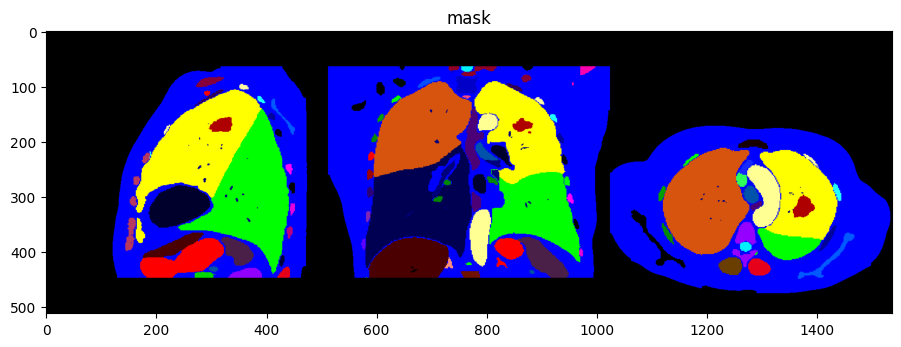

In [4]:
# create a random color map
colorize = torch.clip(torch.cat([torch.zeros(3, 1, 1, 1), torch.randn(3, 200, 1, 1)], 1), 0, 1)
center_loc_axis = find_label_center_loc(torch.flip(volume[0, ...] == target_class_index, [-3, -2, -1]))
mask = get_xyz_plot(volume, center_loc_axis, target_class_index=target_class_index, colorize=colorize, n_label=201)
show_image(mask)

### Apply augmentation to lung tumor

In [5]:
volume_aug = augmentation(volume.unsqueeze(0), volume_shape).squeeze(0)

augmenting lung tumor


### Plot augmented lung tumor

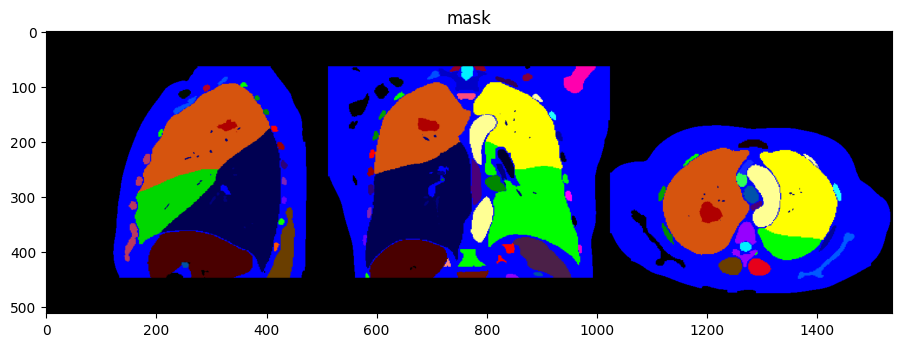

In [6]:
center_loc_axis_aug = find_label_center_loc(torch.flip(volume_aug[0, ...] == target_class_index, [-3, -2, -1]))
augmented_mask = get_xyz_plot(
    volume_aug, center_loc_axis_aug, target_class_index=target_class_index, colorize=colorize, n_label=201
)
show_image(augmented_mask)